# Predição de número de casos da Covid-19 no Brasil 

## Trabalho de Gestão Estratégica da Informação

## Integrantes:
Barbara Pascon RA: 082150060 <br/>
Raquel Sales   RA: 082150312 <br/>
Vítor Castro   RA: 082150381

# Contextualização e descrição da base
<p>
    Doenças infecciosas emergentes e reemergentes são constantes desafios para a saúde pública mundial (BELASCO; FONSECA, 2020). </p>
    <p>
    Com o surgimento do coronavírus e o trabalho proposto, viu-se a oportunidade de analisar de aplicar algoritmos em uma base de dados disponibilizada na internet 
    </p>

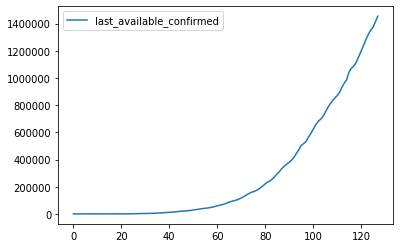

<p style="text-align:center;">
    Figura 1 - Gráfico da curva de crescimento dos caso de Covid-19 no Brasil
    </p>

<p>
O cenário da doença foi delimitado no país com uma visão para analisar o cenário do número de casos da doença por estado.
    </p>
    <p>
    Segundo artigos científicos, ainda é desconhecida a evolução viral e patogenicidade do 2019-nCoV. Embora com letalidade baixa em torno de 3%, a transmissibilidade se apresenta alta (BELASCO; FONSECA, 2020)
    </p>

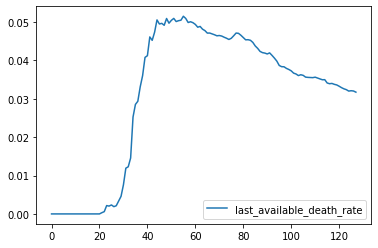

<p style="text-align:center;">
    Figura 2 - Gráfico de mortalidade do Covid-19 no Brasil
    </p>

<p>
    A base de dados utilizada é um dataset disponibilizado pelo Brasil.IO, mantido por Álvaro Justen e colaboradores.
    </p>
    <p>
    “Graças a uma força-tarefa de 40 voluntários que, diariamente, compilam boletins epidemiológicos das 27 Secretarias Estaduais de Saúde, disponibilizamos uma base de dados com a série histórica de casos e óbitos confirmados por município.<br/>
    Embora essenciais para o planejamento de políticas de contenção do novo coronavírus, os dados municipais não têm sido divulgados pelo Ministério da Saúde.<br/>
    Ainda como parte desse esforço contínuo de fornecer dados úteis relacionados à pandemia, disponibilizamos outras bases estruturadas, como população dos municípios afetados, óbitos suspeitos registrados em cartório etc.” (BRASIL.IO, 2020).
    </p>

<p>
    A base utilizada foi a caso_full.csv.gz encontrada no site  <a href="https://data.brasil.io/dataset/covid19/_meta/list.html">brasil.io</a> e baixada no dia 01/07/2020
    </p>
    

##  Clareza do código e descrição da seleção de variáveis
<p>
    A tabela é composta por 17 colunas, detectada como principais informações a data, número da soma de mortes, número de mortes no dia, número totais de casos, número totais de novos casos no dia, qual estado e se é o núemro total do estado ou da cidade, sendo informado no campo cidade, caso seja do estado estará vazio, conforme é ilustrado abaixo
    </p>

In [170]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from fbprophet import Prophet


In [171]:
df = pd.read_csv('caso_full.csv')
df.tail()

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
294902,NaN,43.0,2020-07-01,27,11377239.0,True,False,28171,247.60840,2020-07-01,0.0226,636,114,state,RS,1230,22
294903,NaN,42.0,2020-07-01,27,7164788.0,True,False,27279,380.73702,2020-07-01,0.0127,347,112,state,SC,925,6
294904,NaN,28.0,2020-07-01,27,2298696.0,True,False,25915,1127.37830,2020-07-01,0.0271,702,110,state,SE,504,26
294905,NaN,35.0,2020-07-01,27,45919049.0,True,False,289935,631.40463,2020-07-01,0.0518,15030,128,state,SP,8555,267
294906,NaN,17.0,2020-07-01,27,1572866.0,False,True,11222,713.47464,2020-06-30,0.0182,204,106,state,TO,0,0


<p>
    Como desejamos analisar apenas por estado, selecionamos apenas os dados da tabela que eram estados.
</p>
<p>
    Observação: Depedendo quando você for extrair os dados da base, verificar se todos os estados foram adicionado a base de dados, conforme é ilustrado abaixo:
    </p>

In [172]:
estados = df.loc[df.place_type=='state',:]
estados.state.unique()

array(['SP', 'ES', 'RJ', 'BA', 'DF', 'AL', 'MG', 'RS', 'GO', 'PB', 'PE',
       'PR', 'RN', 'SC', 'AM', 'MS', 'SE', 'CE', 'AC', 'PA', 'TO', 'PI',
       'AP', 'MA', 'MT', 'RO', 'RR'], dtype=object)

<p>
    Após remover os dados indesejável, criamos algumas variávies para facilitar na hora de trabalhar com a base.
    </p>

In [173]:
estado = "SP" #Qaul estado queremos observar
situacao = "new_confirmed" #Qual columa usamos como base
predicao = 30 #quantos dias queremos prever

<p>
    Ficamos em dúvida qual coluna iríamos utilizar para predizer, se avançaríamos por novos casos diário ou pela soma totais dos casos, demonstrando abaixo a diferença dos dois.
</p>

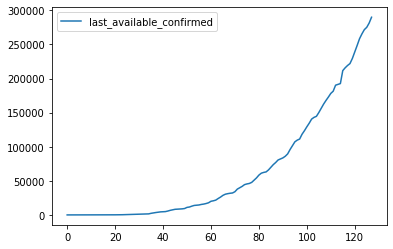

In [174]:
df_estados = estados.loc[estados.state == estado, :]
casosTotais = df_estados.groupby('date').sum()['last_available_confirmed'].reset_index()
casosTotais.plot()

<p style="text-align:left;">
    Figura 3 - Gráfico de casos totais do Covid-19 no estado de São Paulo
    </p>

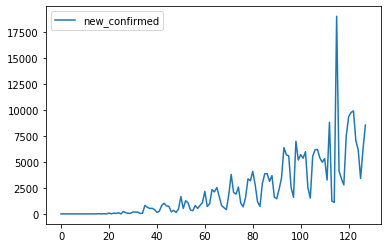

In [175]:
df_estados = estados.loc[estados.state == estado, :]
novosCasos = df_estados.groupby('date').sum()[situacao].reset_index()
novosCasos.plot()

<p style="text-align:left;">
    Figura 4 - Gráfico de novos casos da Covid-19 no Estado de São Paulo
    </p>

<p>
    Conforme foi visualizado, seria melhor prever quantos novos casos iriam ocorrer no futuro do que casos totais, pois a gráfico de casos totais só cresceriam, enquanto de novos casos poderiam acabar zerando no futuro.
    </p>
    

## Implementação e avaliação do algoritmo
<p>
    O algoritmo escolhido foi o Prophet do Facebook.<br/>Ele segue o modelo da API Scikit Learn, onde você cria uma instância da classe Prophet, em seguida, chama os métodos "fit" e "predict". (Facebook 2020)
    </p>
    <p>
    Segundo o Facebook (2020), o Prophet é construído com seu back-en em STAN, uma linguagem de programação probabilística. Isso permite que o Prophet tenha muitas das vantagens oferecidas pelas estatísticas bayesianas, incluindo sazonalidade, inclusão de conhecimento de domínio e intervalos de confiança para criar uma estimativa de risco baseada em dados.
    </p>
    <p>
    Ainda segundo Facebook (2020), a entrada para o Prophet [e flexivel porque permite que um dataframe do pandas possa ser usado como entrada de dados.
    <p>
    <p>
        O algoritmo utilizado pelo Prophet é baseado no modelo ARIMA, que segundo Taylor (2018) Os modelos ARIMA são capazes de incluir covariáveis sazonais, mas a adição dessas covariáveis leva a tempos de apresentação extremamente longos e requer conhecimentos de modelagem que muitos iniciantes em previsão não teriam. 
        </p>
        <p>
    Para utilizar o Prophet, as colunas do dataframe precisa está no formatom idealmente AAAA-MM-DD, que já vinah disponibilziado pela base de dados, e a coluna y, que deve ser numérica, sendo demonstrado abaixo:
    </p>

In [176]:
novosCasos.columns = ['ds','y']
novosCasos.tail()

,ds,y
123,2020-06-27,7073
124,2020-06-28,6156
125,2020-06-29,3408
126,2020-06-30,6235
127,2020-07-01,8555


<p>
       Depois de preparar a tabela, vamos utilziar o Prophet. Normalmente é utilizado um intervalo de confiança de 95% com Prophet, sendo satifastório essa acurácia até o momento que foi realizado a predição. Segue abaixo como realizamos a predição:
    </p>

In [180]:
m = Prophet(interval_width=0.95)
m.fit(novosCasos)
futuro = m.make_future_dataframe(periods=predicao)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<p>
    Conforme é alertado pelo próprio Prophet, a sazonalidade anual e diária está disabilitada, mas como estamos lidando com caso atípico, não foi necessário habilita-los.
    </p>

In [181]:
previsao = m.predict(futuro)

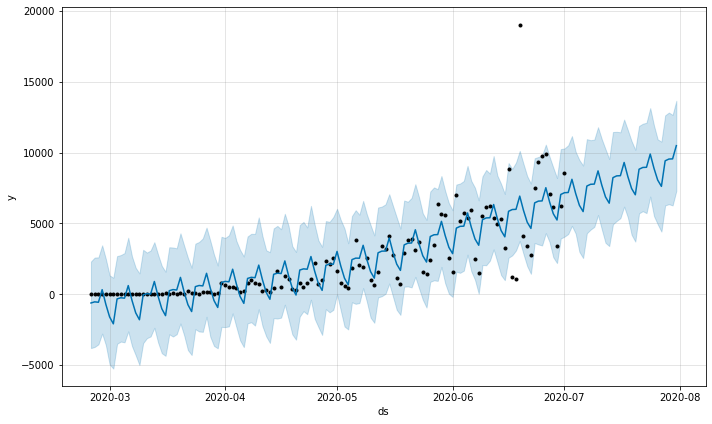

In [182]:
forecast = m.plot(previsao)

<p style="text-align:left;">
    Figura 5 - Gráfico de predição de novos casos da Covid-19 no Estado de São Paulo
    </p>

<p>
    Decidimos comparar o Prophet com uma regressão linear. Para que fosse possível essa comparação, primeiro tivemos que mudar o campo das datas, para dias, para que a regressão linear possa traçar uma reta para tentar prever qual seria o resultado do proximo dia, tudo demostrado abaixo: 
    </p>

In [193]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [194]:
covid = novosCasos
covid = covid.drop('ds',axis=1)
covid['dias'] = covid.index

In [195]:
eixoY = 'dias' #Faciliar na hora de plotar o gráfico
quebra = train_test_split(covid,train_size=0.8)

df_train = quebra[0]

df_test = quebra[1]

In [196]:
X_train = df_train['y'].values.reshape(-1, 1)
X_test = df_test['y'].values.reshape(-1, 1)


y_train = df_train[eixoY].values.reshape(-1, 1)
y_test = df_test[eixoY].values.reshape(-1, 1) 

In [197]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [200]:
xfit=np.linspace(0,6000,num=1000).reshape(-1,1)
yfit=lr.predict(xfit)

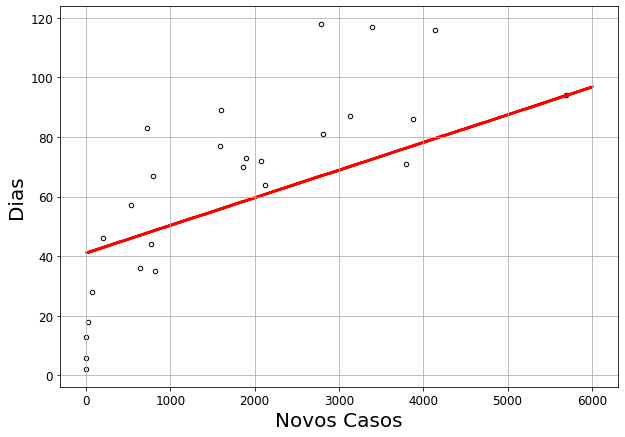

In [201]:
plt.figure(figsize=(10,7))
plt.scatter(df_test['y'],df_test[eixoY], s=20, marker ='o',color='w',edgecolors='black') # Desenha os pontos com os dados
plt.scatter(xfit,yfit,color='r',marker='.',s=10) # Desenha a reta vermelha do ajuste
# Opções de formatação
plt.ylabel('Dias',fontsize=20)
plt.xlabel('Novos Casos',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid()
plt.show()

<p style="text-align:left;">
    Figura 6 - Gráfico da regressão linear sobre os novos casos da Covid-19 no Estado de São Paulo
    </p>

In [206]:
df_test['novos_casos_predito'] = lr.predict(X_test)
df_test['res'] = df_test['y'] - df_test['novos_casos_predito']
#df_test.sort_values(by=['dias'])

C:\Users\VitorCastro\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\VitorCastro\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<p>
    Não entendi por que o pandas está reclamando aqui.
    </p>

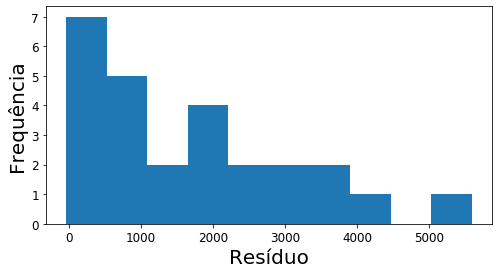

In [203]:
plt.figure(figsize=(8,4))
plt.hist(df_test['res'])
plt.ylabel('Frequência',fontsize=20)
plt.xlabel('Resíduo',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

<p style="text-align:left;">
    Figura 7 - Histograma de quantos resíduo deu por milhar da regressão linear
    </p>

In [204]:
eqm = np.mean((y_test - lr.predict(X_test))**2)
eqm

568.9793417574236

In [215]:
previsao.describe()['yhat']

count      158.000000
mean      3381.486460
std       3188.298471
min      -2083.424748
25%        680.472734
50%       2793.187616
75%       5968.784816
max      10490.295137
Name: yhat, dtype: float64

<p>
    Analisando os dados da regressão linear e do Prophet, podemos concluir que o erro quadrático médio da regressão está muito grande, apesar que o Prophet esteja variando entorno de 3 mil, ele também acompanha as descida e subidas dos casos, concluindo que uma serie temporal para prever algo tão compelxo quanto uma pandemia é melhor do que utilizar uma regressão linear simples. 
    </p>

##  Proposta de Uso e Implantação
<p>
    Como prosposta de uso, a melhor alernativa seria para o governo do estado utiliza-los para verificar se suas ações publicas estão diminuindo os casos ao longo do tempo, tendo que realimentar o algoritmo a cada uma semana, pois o corona vírus sendo tão contagiantes e os comportamentos das pessoas sendo imprevísiveis, é melhor retrablhar o algoritmo a cada 7 dias.
    </p>

## Bibliografia
<p>BELASCO AGS, FONSECA CD. Coronavírus 2020. Rev Bras Enferm. 2020;73(2):e2020n2. doi: http://dx.doi.org/10.1590/0034-7167-2020730201</p>
<p>BRASIL.IO. ESPECIAL COVID-19: DADOS POR MUNICÍPIO. [S. l.], 2020. Disponível em: https://brasil.io/home/. Acesso em: 1 jul. 2020.</p>
<p>PROPHET, Prophet – Facebook Open Source.https://facebook.github.io/prophet/docs  Acessp em: 4 jul. 2020
</p>

<p>TAYLOR, Sean J.; LETHAM, Benjamin. Forecasting at scale. The American Statistician, v. 72, n. 1, p. 37-45, 2018.</p>


## Código de Referência para alguns gráficos

### Figura 1

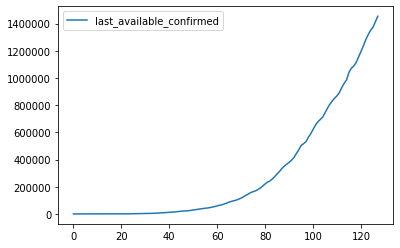

In [205]:
casosBrasil = estados.groupby('date').sum()['last_available_confirmed'].reset_index()
casosBrasil.plot()

### Figura 2

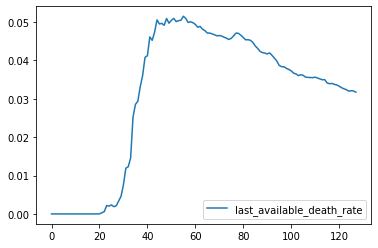

In [161]:
mortesBrasil = estados.groupby('date').mean()['last_available_death_rate'].reset_index()
mortesBrasil.plot()